In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re

In [4]:
new = pd.read_csv('../기계학습/naver_news_해외증시.csv')
new

,Unnamed: 0,title,time
0,0,"'화려한 피날레' 뉴욕증시, 2019년 30% 날았다",2020-01-01 15:10
1,1,"'화려한 피날레' 뉴욕증시, 2019년 30% 날았다",2020-01-01 15:10
2,2,[표]유럽 주요기업 주가(12/31),2020-01-01 11:27
3,3,"'화려한 피날레' 뉴욕증시, 2019년 30% 날았다",2020-01-01 15:10
4,4,[표]유럽 주요기업 주가(12/31),2020-01-01 11:27
...,...,...,...
26518,26518,S&P500·나스닥 또 사상최고...쿠팡 10.2%↑ [출근전 꼭 글로벌브리핑],2021-06-30 06:45
26519,26519,[뉴욕증시]위험자산 떠받치는 경기 반등…S&P·나스닥 또 신고점,2021-06-30 06:41
26520,26520,"뉴욕증시, 지표 강세에 상승…S&P500·나스닥 최고 마감",2021-06-30 06:05
26521,26521,집값 폭등 속 S&P·나스닥 또 사상 최고치 [데일리 국제금융시장],2021-06-30 05:26


In [5]:
# 'title'열 중복 제거
new = new.drop_duplicates(subset=['title'])
new = new[["title","time"]]
display(new)

# kospi 불러오기
import pandas_datareader as wb
import datetime

pd.set_option('precision', 4)

start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2021, 6, 30)
df_null = wb.DataReader("^KS11","yahoo",start,end)     # ^KS11 : 코스피
df = df_null.dropna() 
df

,title,time
0,"'화려한 피날레' 뉴욕증시, 2019년 30% 날았다",2020-01-01 15:10
2,[표]유럽 주요기업 주가(12/31),2020-01-01 11:27
5,[표]해외 한국 DR(12/31),2020-01-01 11:24
9,[표]미국 주요기업 주가(12/31),2020-01-01 11:10
14,"美증시 3대지수, 일제히 상승 마감…2019년 역대급 상승",2020-01-01 09:10
...,...,...
26492,S&P500·나스닥 또 사상최고...쿠팡 10.2%↑ [출근전 꼭 글로벌브리핑],2021-06-30 06:45
26498,[뉴욕증시]위험자산 떠받치는 경기 반등…S&P·나스닥 또 신고점,2021-06-30 06:41
26505,"뉴욕증시, 지표 강세에 상승…S&P500·나스닥 최고 마감",2021-06-30 06:05
26513,집값 폭등 속 S&P·나스닥 또 사상 최고치 [데일리 국제금융시장],2021-06-30 05:26


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,2202.3201,2171.8401,2201.2100,2175.1699,494700,2175.1699
2020-01-03,2203.3799,2165.3899,2192.5801,2176.4600,631600,2176.4600
2020-01-06,2164.4199,2149.9500,2154.9700,2155.0701,592700,2155.0701
2020-01-07,2181.6201,2164.2700,2166.6001,2175.5400,568200,2175.5400
2020-01-08,2162.3201,2137.7200,2156.2700,2151.3101,913800,2151.3101
...,...,...,...,...,...,...
2021-06-24,3292.2700,3277.8501,3281.4700,3286.1001,1300300,3286.1001
2021-06-25,3316.0801,3289.1799,3289.1799,3302.8401,1197600,3302.8401
2021-06-28,3311.6899,3291.3000,3305.4600,3301.8899,1427400,3301.8899


In [6]:
# 새로운 칼럼 생성
# (Price : 당일 주가가 상승했으면 1, 하락했으면 0)
df['Price'] = 0
for i in range(0, 370):
    if df['Close'][i] > df['Close'][i-1]:
        df['Price'][i] = 1
    else:
        df['Price'][i] = 0

# 파일 저장
df = df.reset_index()
df = df[["Date","Price"]]
#df.to_csv('kospi_200101_210630.csv')
df.head(3)

<ipython-input-6-4b5c5b87076e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 0
<ipython-input-6-4b5c5b87076e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price'][i] = 1


,Date,Price
0,2020-01-02,0
1,2020-01-03,1
2,2020-01-06,0


In [7]:
#new = new.rename(columns={'time':'Date'})
new.head()

Y = new["time"]

c1_list = []
for i in Y:
    i = i[0:10]  # year 부분만 추출
    c1_list.append(i)  # list 로 저장
    
new.insert(1,"Date",c1_list)
new.head()

,title,Date,time
0,"'화려한 피날레' 뉴욕증시, 2019년 30% 날았다",2020-01-01,2020-01-01 15:10
2,[표]유럽 주요기업 주가(12/31),2020-01-01,2020-01-01 11:27
5,[표]해외 한국 DR(12/31),2020-01-01,2020-01-01 11:24
9,[표]미국 주요기업 주가(12/31),2020-01-01,2020-01-01 11:10
14,"美증시 3대지수, 일제히 상승 마감…2019년 역대급 상승",2020-01-01,2020-01-01 09:10


In [8]:
new['Date'] = pd.to_datetime(new['Date'])

result = pd.merge(new, df, on = 'Date', how = 'inner')
#result = result[["title", "Date", "Price"]]
result

,title,Date,time,Price
0,[표]아시아 주요 증시(1월 2일),2020-01-02,2020-01-02 19:16,0
1,"[Asia마감]中, 5년 만에 가장 화끈했던 첫날",2020-01-02,2020-01-02 17:34,0
2,"'곤 떠난' 르노·닛산, 2019년 최악 성적표 받았다",2020-01-02,2020-01-02 15:31,0
3,[Asia오전]가파른 상승세로 새해 첫 거래 시작한 中,2020-01-02,2020-01-02 15:10,0
4,"日기업가들 ""올해 닛케이 2만5000선 넘을 것""",2020-01-02,2020-01-02 14:37,0
...,...,...,...,...
5151,S&P500·나스닥 또 사상최고...쿠팡 10.2%↑ [출근전 꼭 글로벌브리핑],2021-06-30,2021-06-30 06:45,0
5152,[뉴욕증시]위험자산 떠받치는 경기 반등…S&P·나스닥 또 신고점,2021-06-30,2021-06-30 06:41,0
5153,"뉴욕증시, 지표 강세에 상승…S&P500·나스닥 최고 마감",2021-06-30,2021-06-30 06:05,0
5154,집값 폭등 속 S&P·나스닥 또 사상 최고치 [데일리 국제금융시장],2021-06-30,2021-06-30 05:26,0


In [9]:
result.info() # null 값 없음

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5156 entries, 0 to 5155
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   title   5156 non-null   object        
 1   Date    5156 non-null   datetime64[ns]
 2   time    5156 non-null   object        
 3   Price   5156 non-null   int64         
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 201.4+ KB


In [10]:
from konlpy.tag import Okt  # 형태소 분석기 불러오기
okt = Okt()                 # Okt 형태소 분석기를 불러 okt에 저장한다.

In [11]:
# 한글 폰트 사용을 위해서 세팅
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
font = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family = font)

In [29]:
# 불필요한 단어 제거
stop_words = ['[', ']' , '(' , ')', '"', '코스닥', '특징', '종목' , '·' , '장' , '코스피' , '증시' , '-' ,\
              '기술', '분석', '마감' , '`' , '요약' , '’' , '오전' , '★' , 'B' ,\
              '?','A','오후','5%','!','"…','만에' , '…"' ,"'…",\
              '···','으로','...',"…'",'만','9','VI','까지',\
             '눈','더','e','량','고','인','52','성','띄네','1%','부터','다','감','을','지','4','에도','수','7','것','째',\
             '체크','기','···','중','계','관련','왜','1억원','총','내','과','젠','또','연','엔','차','굿모닝','할','8','.',\
             '보다','새','주간','전망','추천','이슈','플러스','사','개월','때','..','임','속','’…','G','나','개','원','에서',\
             '하는','이유','달','→','권','?…','단독','간','배','30','K','저','와','하','/','1조','6','두','해야','분','형',\
             '황','공','&','앞두고','보','문','이번','익','X','1억',']"','치','산','를','오','해','S','우리','그','된','준','▶',\
             '건','재','반','라','10년','초','3분','월','신','p','급','조','줄','경','했다','구','진','이어','올','발','vs','강',\
             '국','9억','1년','난','판','면','"(','`…','살','아','인데','번','텍','팜','8월','Q','메','2년','점','하고','10월',\
             'D','비','됐다','채',"]'",'보니','손','확','종','동','팔','40','타','~','9월','2100','30%','땐','말','한다','요',\
             '오후', '현재', '최종', '이재명','코스','추락', '투자','주체', '동향','매매','마감','새해','종료' , \
             '파크', '시스템스', '아이', '태림', '포장', '신년사', '신고', '건설', \
             '베뉴','닛산', '르노', '상선', '개장', '기념', '촬영', '정오', '오전', '한국', '석유', '에스', \
             '케이', '사진', '게시판', '장외', '주식', '에이', '프로', '완만', '특징', '비트코인', '개장',\
              '이슈' ,'진단', '드래곤플라이', '속보', '목멱','칼럼', '일일', '펀드', '채권', '펀드', '그래픽', '투자', '생활', \
              '특징', '사주', '신청', '주변', '레이더', '안희준', '성대' ,'교수','한국', '증권', '학회', '취임',\
              '코스닥시장', '위원장', '김학균','종목', '취임', '금투협', '회장','슈퍼', '개미','라씨', '장마', \
              '단독', '종합', '증시', '긴급', '진단', '시그널', '단독', '시선', '집콕', '시대', '수혜', '기대', \
              '오늘', '환종', '글로벌', '클라우드', '데이터', '센터', '전망', '은행', '지점', '비용', '절감', \
              '보험', '대리점', '허용', '검토', '주식시장', '업종', '공략', '박정림', '사장', '디지털', '혁신', '리더', \
              '포토', '이데일리', '웰스', '투어', '강연', '황정', '전략', '상품','부장', '고종', '가현', '민정', \
              '연결', '부채', '비율', '상위', '레이더', '상대', '메리트', '등급', '이하', '신용', '회사채', '투심', \
              '두산', '판가름', '나나', '수능', '정규', '시장', '연기', '오전', '개장', '방통위', '이용자', '보호', '업무',\
              '평가', '앱스토어', '스토어', '페북', '미흡', '블릭','시세', '한지붕', '개사', '세상', '콘텐츠', \
              '금융투자', '한국', '인도네시아', '김치', '본드', '발행', '성장', '가치주', '날개', '시대', \
              '보고', '결정', '보안', '관리', '설계', '협업', '솔루션', '무료', '공개', '하나', '금투', '청각', '언어장애',\
              '아동', '지원', '연금', '저축', '수익률', '성은', '적합', '대신', '이벤트', '실시', '마케팅', '컴퍼니', '도약', \
              '산업', '웨비', '개최', '사람', '기술', '기업', '유통', '혁신','김경규', '하이', '투자', '증권', '대표이사', \
              '잡초', '주지', '감히', '절하', '생큐', '여성','식초', '고수', '카드', '페이', '간편', '투자', '출시', '최대',\
              '혜택', '저명', '교수', '양동훈', '김종일', '교수', '선정','강우석', '돋보기', '분리', '세계', '공모', '흥행',\
              '유니콘', '상장', '활성화', '증권사', '간담', '에프', '앤비', '코람코', '에너지', '리츠','노심초사' \
              '굿모닝', '윤석열', '테마주', '희림', '채권', '전용', '세그먼트', '개설', '주년', '기념', \
              '고수', '조언','플러스', '비상', '누적', '돌파', '실리콘밸리', '유망', '쿠콘', '데이터', '서비스', '페이', '사업',\
              '먼저', '이재명', '테마주','신뢰', '경자년', '수장', '경영', '워드','김영규', '최현', '이창호', '파생상품','입장', \
              '성수', '정지원', '정일', '어룡', '중소형주', '헤지', '자산운용','실전', '대회', '누가', '라임', '판매', '미리보기',\
              '떙큐', '손병두','가장', '일리', '선물', '국제상품', '주요', '유럽','김현석', '월스트리트', '나우', \
              '스팟','용산', '공원', '부지', '정세균', '총리와', '국무위원','국토부','이정훈','브리핑','앤트', '레터','김정남',\
              '쿠팡', '직원', '알짜', '신정은', '돈나무','학생' ,\
             ]

In [30]:
# 명사만 추출해서 새 변수 만들기
a = []  # a list 생성

for j in range(len(result["title"])):
    nouns = okt.nouns(result.iloc[j]['title'])  # okt 적용
    nouns = [word for word in nouns if len(word) > 1]  # 글자 수가 1 이상인 것만 추출
    nouns = [word for word in nouns if not re.match(r"\d+", word)]  # 숫자 연속으로 된 것 제거
    ko = [each_word for each_word in nouns if each_word not in stop_words]
    #print(ko)
    #print(nouns)
    a.append(' '.join(ko))  # a list에 추가
result['nouns'] = a  # result 데이터프레임에 a 변수 추가
result

,title,Date,time,Price,nouns
0,[표]아시아 주요 증시(1월 2일),2020-01-02,2020-01-02 19:16,0,아시아
1,"[Asia마감]中, 5년 만에 가장 화끈했던 첫날",2020-01-02,2020-01-02 17:34,0,첫날
2,"'곤 떠난' 르노·닛산, 2019년 최악 성적표 받았다",2020-01-02,2020-01-02 15:31,0,최악 성적표
3,[Asia오전]가파른 상승세로 새해 첫 거래 시작한 中,2020-01-02,2020-01-02 15:10,0,가파른 상승세 거래 시작
4,"日기업가들 ""올해 닛케이 2만5000선 넘을 것""",2020-01-02,2020-01-02 14:37,0,기업가 올해
...,...,...,...,...,...
5151,S&P500·나스닥 또 사상최고...쿠팡 10.2%↑ [출근전 꼭 글로벌브리핑],2021-06-30,2021-06-30 06:45,0,나스닥 사상 최고 출근
5152,[뉴욕증시]위험자산 떠받치는 경기 반등…S&P·나스닥 또 신고점,2021-06-30,2021-06-30 06:41,0,뉴욕증시 위험 자산 경기 반등 나스닥
5153,"뉴욕증시, 지표 강세에 상승…S&P500·나스닥 최고 마감",2021-06-30,2021-06-30 06:05,0,뉴욕증시 지표 강세 상승 나스닥 최고
5154,집값 폭등 속 S&P·나스닥 또 사상 최고치 [데일리 국제금융시장],2021-06-30,2021-06-30 05:26,0,집값 폭등 나스닥 사상 최고 국제 금융시장


In [31]:
result.to_csv('kospi_200101_210630_당일_명사추출(해외증시).csv')

### 여기서부터

In [37]:
result = pd.read_csv("../기계학습/kospi_200101_210630_당일_명사추출(해외증시).csv")
result = result.dropna(axis = 0)
result

,Unnamed: 0,title,Date,time,Price,nouns
0,0,[표]아시아 주요 증시(1월 2일),2020-01-02,2020-01-02 19:16,0,아시아
1,1,"[Asia마감]中, 5년 만에 가장 화끈했던 첫날",2020-01-02,2020-01-02 17:34,0,첫날
2,2,"'곤 떠난' 르노·닛산, 2019년 최악 성적표 받았다",2020-01-02,2020-01-02 15:31,0,최악 성적표
3,3,[Asia오전]가파른 상승세로 새해 첫 거래 시작한 中,2020-01-02,2020-01-02 15:10,0,가파른 상승세 거래 시작
4,4,"日기업가들 ""올해 닛케이 2만5000선 넘을 것""",2020-01-02,2020-01-02 14:37,0,기업가 올해
...,...,...,...,...,...,...
5151,5151,S&P500·나스닥 또 사상최고...쿠팡 10.2%↑ [출근전 꼭 글로벌브리핑],2021-06-30,2021-06-30 06:45,0,나스닥 사상 최고 출근
5152,5152,[뉴욕증시]위험자산 떠받치는 경기 반등…S&P·나스닥 또 신고점,2021-06-30,2021-06-30 06:41,0,뉴욕증시 위험 자산 경기 반등 나스닥
5153,5153,"뉴욕증시, 지표 강세에 상승…S&P500·나스닥 최고 마감",2021-06-30,2021-06-30 06:05,0,뉴욕증시 지표 강세 상승 나스닥 최고
5154,5154,집값 폭등 속 S&P·나스닥 또 사상 최고치 [데일리 국제금융시장],2021-06-30,2021-06-30 05:26,0,집값 폭등 나스닥 사상 최고 국제 금융시장


##### 데이터셋 분리

In [38]:
# train_data, validation_data 분리
from sklearn.model_selection import train_test_split

x = result['nouns']  # nouns 변수
y = result['Price']  # Price 변수
 
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 13)  # train과 test 나누기
x_train, x_validation, y_train, y_validation = train_test_split(x_train, y_train, test_size = 0.2, random_state = 13)  # train과 validation 나누기

##### 토큰나이저(문자를 숫자로 변경해주기)

In [39]:
from tensorflow.keras.preprocessing.text import Tokenizer

# str => int로 바꾸기
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x_train)

print(tokenizer.word_index)
a = len(tokenizer.word_index)
print(a)  # 2679

{'주가': 1, '뉴욕증시': 2, '해외': 3, '상승': 4, '코로나': 5, '미국': 6, '다우': 7, '하락': 8, '아시아': 9, '나스닥': 10, '테슬라': 11, '최고': 12, '뉴욕': 13, '국제': 14, '급락': 15, '일본': 16, '급등': 17, '금융시장': 18, '부양책': 19, '중국': 20, '폭락': 21, '금리': 22, '우려': 23, '반등': 24, '가격': 25, '백신': 26, '사상': 27, '출발': 28, '강세': 29, '환율': 30, '바이든': 31, '경기': 32, '달러': 33, '애플': 34, '지수': 35, '유가': 36, '회복': 37, '확산': 38, '거래': 39, '실적': 40, '폭등': 41, '트럼프': 42, '대감': 43, '일제': 44, '경제': 45, '출근': 46, '외환': 47, '약세': 48, '인플레': 49, '서학': 50, '파월': 51, '공포': 52, '머스크': 53, '지표': 54, '국채': 55, '다우지수': 56, '다시': 57, '올해': 58, '스톡': 59, '게임스톱': 60, '랠리': 61, '완화': 62, '홍콩': 63, '하루': 64, '신종': 65, '독점': 66, '주목': 67, '경고': 68, '주시': 69, '재개': 70, '합의': 71, '화폐': 72, '이틀': 73, '조세': 74, '내년': 75, '골드만삭스': 76, '아마존': 77, '코인': 78, '호조': 79, '위험': 80, '매수': 81, '상하이': 82, '리포트': 83, '대선': 84, '추가': 85, '봉쇄': 86, '급증': 87, '규제': 88, '테크': 89, '목표': 90, '버핏': 91, '갈등': 92, '투자자': 93, '미국증시': 94, '붕괴': 95, '부양': 96, '지속': 97, '첫날': 98, '물

In [40]:
x_train = tokenizer.texts_to_sequences(x_train)
x_validation = tokenizer.texts_to_sequences(x_validation)

##### 가장 긴 문장 갯수 확인하기

리뷰의 최대 길이 : 11
리뷰의 평균 길이 : 4.413353566009104


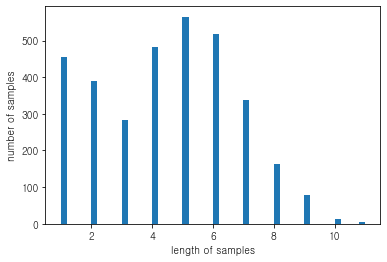

In [41]:
print('리뷰의 최대 길이 :',max(len(l) for l in x_train))
print('리뷰의 평균 길이 :',sum(map(len, x_train))/len(x_train))
plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [42]:
from tensorflow.keras.preprocessing import sequence

def below_threshold_len(max_len, nested_list):
  count = 0
  for sentence in nested_list:
    if(len(sentence) <= max_len):
        count = count + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s' %(max_len, (count / len(nested_list))*100))

In [43]:
max_len = 11
below_threshold_len(max_len, x_train)

전체 샘플 중 길이가 11 이하인 샘플의 비율: 100.0


##### padding 작업 (모든 샘플 길이를 17로 맞추기)

In [44]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

# 모든 샘플의 길이를 17로 맞추기
x_train = pad_sequences(x_train, maxlen = max_len)
x_validation = pad_sequences(x_validation, maxlen = max_len)

In [45]:
print(x_train)
print(y_train.shape)
print(x_validation.shape)
print(y_validation.shape)

[[   0    0    0 ... 1206    2  232]
 [   0    0    0 ...   11  417  354]
 [   0    0    0 ...   78  174   98]
 ...
 [   0    0    0 ...  539   45  308]
 [   0    0    0 ... 2679   24 1047]
 [   0    0    0 ...    0   16    1]]
(3295,)
(824, 11)
(824,)


##### 인코딩 (ex.[0,0,1,0,0], [0,1,0,0,0])

In [46]:
from tensorflow.keras.utils import to_categorical

x_train_encode = to_categorical(x_train, num_classes = 2680)  # num_classes = 2680 꼭 적기
x_validation_encode = to_categorical(x_validation, num_classes = 2680)

In [47]:
print(x_train_encode.shape)
print(y_train.shape)
print(x_validation_encode.shape)

(3295, 11, 2680)
(3295,)
(824, 11, 2680)


In [48]:
print(x_train_encode.shape)
print(y_train_over.shape)
print(x_validation_encode.shape)

(3295, 11, 2680)


NameError: name 'y_train_over' is not defined

##### lstm 적용하기

In [49]:
# LSTM 모델 만들기
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [50]:
model = Sequential()

model.add(LSTM(32,input_shape = (11, 2680)))
model.add(Dense(1,activation = 'sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 32)                347264    
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 347,297
Trainable params: 347,297
Non-trainable params: 0
_________________________________________________________________


In [51]:
# 모델 학습
model.compile(optimizer = 'sgd', loss = 'binary_crossentropy',metrics = ['accuracy'])
#model.compile(optimizer= 'adam', loss = 'binary_crossentropy',metrics = ['accuracy'])

hist = model.fit(x_train_encode, y_train, epochs = 10, batch_size = 50, validation_data = (x_validation_encode,y_validation))

Epoch 1/10
66/66 [==============================] - 11s 71ms/step - loss: 0.6878 - accuracy: 0.5821 - val_loss: 0.6834 - val_accuracy: 0.5874
Epoch 2/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6826 - accuracy: 0.5821 - val_loss: 0.6800 - val_accuracy: 0.5874
Epoch 3/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6805 - accuracy: 0.5821 - val_loss: 0.6786 - val_accuracy: 0.5874
Epoch 4/10
66/66 [==============================] - 3s 44ms/step - loss: 0.6797 - accuracy: 0.5821 - val_loss: 0.6779 - val_accuracy: 0.5874
Epoch 5/10
66/66 [==============================] - 3s 50ms/step - loss: 0.6793 - accuracy: 0.5821 - val_loss: 0.6776 - val_accuracy: 0.5874
Epoch 6/10
66/66 [==============================] - 3s 46ms/step - loss: 0.6792 - accuracy: 0.5821 - val_loss: 0.6775 - val_accuracy: 0.5874
Epoch 7/10
66/66 [==============================] - 3s 50ms/step - loss: 0.6791 - accuracy: 0.5821 - val_loss: 0.6775 - val_accuracy: 0.5874
Epoch 8/10
6

In [52]:
# 모델 평가
model.evaluate(x = x_validation_encode, y = y_validation)

# 정확도 약 58.74% (높진 않다.)

26/26 [==============================] - 1s 15ms/step - loss: 0.6774 - accuracy: 0.5874


[0.6773971915245056, 0.5873786211013794]

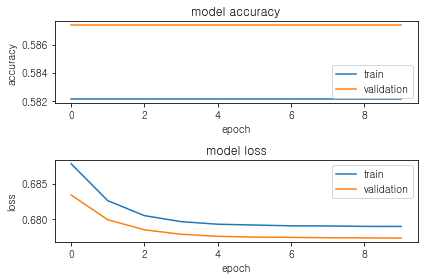

In [53]:
import matplotlib.pyplot as plt

# plotting the metrics
fig = plt.figure()
plt.subplot(2,1,1)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='lower right')

plt.subplot(2,1,2)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')

plt.tight_layout()